# Car price prediction
This analysis tells us two key features : 
    1. What are the significant factors in predicting the price of the car?
    2. How well those factors describe the car?

In [319]:
import pandas as pd

In [320]:
df = pd.read_excel('UsedCarsData.xlsx')

Lets have a look at the data

In [228]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [172]:
df.shape

(6019, 13)

In [173]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB


Check the unique values from all the categorical features 

In [321]:
print(df['Fuel_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner_Type'].unique())

['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']
['Manual' 'Automatic']
['First' 'Second' 'Fourth & Above' 'Third']


Check missing values 

In [322]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

# Step 2 Data Cleaning and Preparation 
As we can above, we have alot of NA or missing values in the column 'New Price'.Hence we drop that column as it is not necessary and does not bring fruitful contribution in our analysis. We can just handle the other missing values by random sample imputation.

In [323]:
df.drop('New_Price',axis=1,inplace=True)

In [324]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


Before handling the missing values, we need to convert the categorical variables into numeric 
Replace the kmpl, cc and bhp units with blanks. 

In [325]:
df['Mileage'] = df['Mileage'].str.replace('kmpl','')
df['Mileage'] = df['Mileage'].str.replace('km/kg','')
df['Engine'] = df['Engine'].str.replace('CC', '')
df['Power'] = df['Power'].str.replace('bhp','')

In [326]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [327]:
print(df['Mileage'].apply(type))
print(df['Engine'].apply(type))
print(df['Power'].apply(type))

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
6014    <class 'str'>
6015    <class 'str'>
6016    <class 'str'>
6017    <class 'str'>
6018    <class 'str'>
Name: Mileage, Length: 6019, dtype: object
0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
6014    <class 'str'>
6015    <class 'str'>
6016    <class 'str'>
6017    <class 'str'>
6018    <class 'str'>
Name: Engine, Length: 6019, dtype: object
0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
6014    <class 'str'>
6015    <class 'str'>
6016    <class 'str'>
6017    <class 'str'>
6018    <class 'str'>
Name: Power, Length: 6019, dtype: object


The apply(type) code runs the type function on each value in the column. Using this we can check the datatype of all the values in the column. We can see that all the 3 columns are of type string, which need to be converted to numeric. 

In [328]:
df['Engine'] = pd.to_numeric(df['Engine'])
df['Mileage'] = pd.to_numeric(df['Mileage'])
df['Power'] = pd.to_numeric(df['Power'],errors='coerce')

errors='coerce' converts bad non numeric values to NaN which helps to change the datatype of that column and deal with missing data 

In [329]:
print(df['Power'].apply(type))
print(df['Engine'].apply(type))
print(df['Mileage'].apply(type))

0       <class 'float'>
1       <class 'float'>
2       <class 'float'>
3       <class 'float'>
4       <class 'float'>
             ...       
6014    <class 'float'>
6015    <class 'float'>
6016    <class 'float'>
6017    <class 'float'>
6018    <class 'float'>
Name: Power, Length: 6019, dtype: object
0       <class 'float'>
1       <class 'float'>
2       <class 'float'>
3       <class 'float'>
4       <class 'float'>
             ...       
6014    <class 'float'>
6015    <class 'float'>
6016    <class 'float'>
6017    <class 'float'>
6018    <class 'float'>
Name: Engine, Length: 6019, dtype: object
0       <class 'float'>
1       <class 'float'>
2       <class 'float'>
3       <class 'float'>
4       <class 'float'>
             ...       
6014    <class 'float'>
6015    <class 'float'>
6016    <class 'float'>
6017    <class 'float'>
6018    <class 'float'>
Name: Mileage, Length: 6019, dtype: object


Now that everything is float, we can handle missing data by using various imputation methods. Here I am using 2 methods 
1. To replace with median value
2. To use random sample imputation

Once done, I will compare the results of both methods and choose the best 

In [330]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [331]:
median=df.Engine.median()
print(median)

median1 = df.Power.median()
print(median1)

median2 = df.Mileage.median()
print(median2)

1493.0
97.7
18.15


In [332]:
impute_nan(df,"Engine",median)
impute_nan(df,'Power',median1)
impute_nan(df,'Mileage',median2)

In [333]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Engine_median,Engine_random,Power_median,Power_random,Mileage_median,Mileage_random
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,998.0,998.0,58.16,58.16,26.60,26.60
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,1582.0,1582.0,126.20,126.20,19.67,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,1199.0,1199.0,88.70,88.70,18.20,18.20
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,1248.0,1248.0,88.76,88.76,20.77,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,1968.0,1968.0,140.80,140.80,15.20,15.20


In [334]:
import matplotlib.pyplot as plt
%matplotlib inline

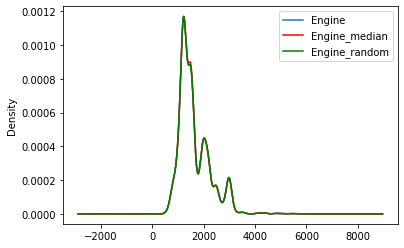

In [335]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Engine'].plot(kind='kde', ax=ax)
df.Engine_median.plot(kind='kde', ax=ax, color='red')
df.Engine_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

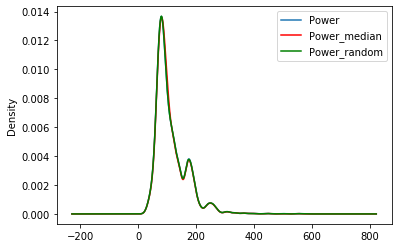

In [336]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Power'].plot(kind='kde', ax=ax)
df.Power_median.plot(kind='kde', ax=ax, color='red')
df.Power_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

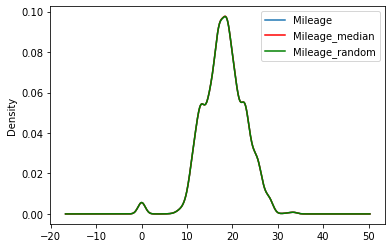

In [337]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Mileage'].plot(kind='kde', ax=ax)
df.Mileage_median.plot(kind='kde', ax=ax, color='red')
df.Mileage_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

As you can see there is no difference between the median and random sample values. So in this case, it is okay to use any of the two techniques. Now that the missing data is handled, lets check whether any missing values are still present or not

In [338]:
df.isnull().sum()

Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
Price                  0
Engine_median          0
Engine_random          0
Power_median           0
Power_random           0
Mileage_median         0
Mileage_random         0
dtype: int64

As here, we have created new columns for handling missing data, those columns do not have missing values and we are good to go!

We will drop the columns which are not needed as well as do not create impact on our predictions. We then create final dataset on which we do our final analysis.

In [347]:
df.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Engine_median', 'Engine_random', 'Power_median',
       'Power_random', 'Mileage_median', 'Mileage_random'],
      dtype='object')

In [348]:
final_df = df[['Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission','Owner_Type','Seats',
       'Price', 'Engine_median', 'Power_median','Mileage_median']]

In [349]:
final_df.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Engine_median,Power_median,Mileage_median
0,2010,72000,CNG,Manual,First,5.0,1.75,998.0,58.16,26.60
1,2015,41000,Diesel,Manual,First,5.0,12.50,1582.0,126.20,19.67
2,2011,46000,Petrol,Manual,First,5.0,4.50,1199.0,88.70,18.20
3,2012,87000,Diesel,Manual,First,7.0,6.00,1248.0,88.76,20.77
4,2013,40670,Diesel,Automatic,Second,5.0,17.74,1968.0,140.80,15.20


We will calculate the year difference in order to determine how old the car is 

In [350]:
#from datetime import date
#date = date.today()
#print(date.year)
final_df['Current'] = 2020
final_df['Year_diff'] = final_df['Current'] - final_df['Year']

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [351]:
final_df.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Engine_median,Power_median,Mileage_median,Current,Year_diff
0,2010,72000,CNG,Manual,First,5.0,1.75,998.0,58.16,26.60,2020,10
1,2015,41000,Diesel,Manual,First,5.0,12.50,1582.0,126.20,19.67,2020,5
2,2011,46000,Petrol,Manual,First,5.0,4.50,1199.0,88.70,18.20,2020,9
3,2012,87000,Diesel,Manual,First,7.0,6.00,1248.0,88.76,20.77,2020,8
4,2013,40670,Diesel,Automatic,Second,5.0,17.74,1968.0,140.80,15.20,2020,7


In [352]:
final_df.drop(['Year'],axis=1,inplace=True)
final_df.drop(['Current'],axis=1,inplace=True)
final_df.drop(['Seats'],axis=1,inplace=True)

In [353]:
final_df.head()

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Price,Engine_median,Power_median,Mileage_median,Year_diff
0,72000,CNG,Manual,First,1.75,998.0,58.16,26.60,10
1,41000,Diesel,Manual,First,12.50,1582.0,126.20,19.67,5
2,46000,Petrol,Manual,First,4.50,1199.0,88.70,18.20,9
3,87000,Diesel,Manual,First,6.00,1248.0,88.76,20.77,8
4,40670,Diesel,Automatic,Second,17.74,1968.0,140.80,15.20,7


Let us visualize our data to get insights on how we should proceed 

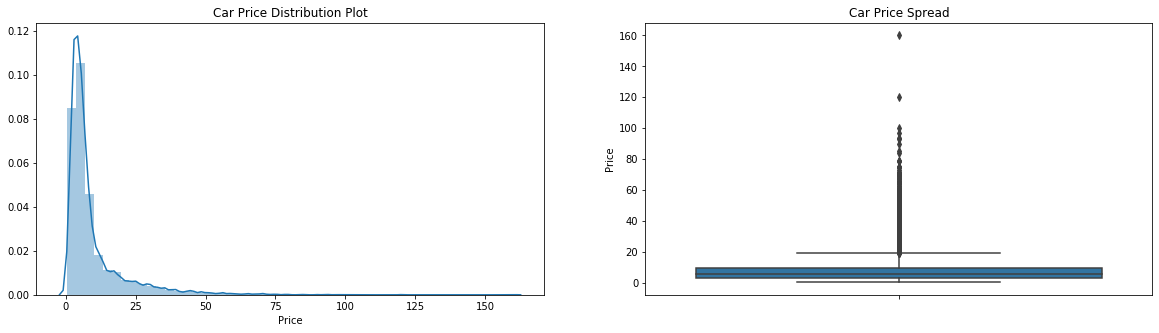

In [354]:
import seaborn as sns
plt.figure(figsize=(20,5))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(final_df.Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=final_df.Price)

plt.show()

The plot seemed to be right-skewed, meaning that the most prices in the dataset are low(Below 50).
There is not a significant difference between the mean and the median of the price distribution

Now let us visualize some categorical data 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  after removing the cwd from sys.path.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='bar')` instead of `Series.plot('bar',)`.
  if __name__ == '__main__':


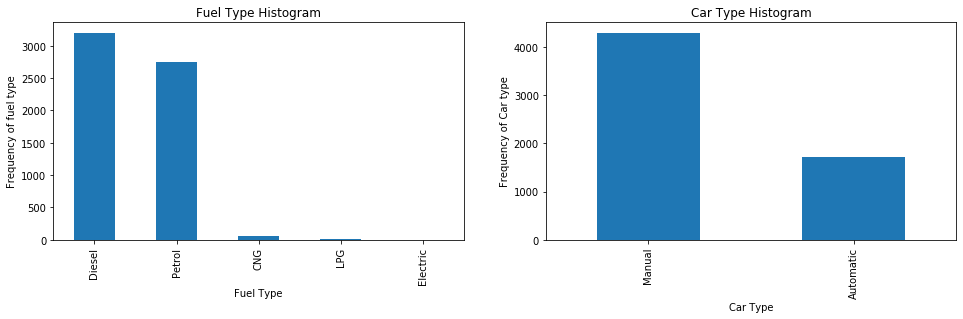

In [355]:
plt.figure(figsize=(25,4))

plt.subplot(1,3,2)
plt1 = final_df.Fuel_Type.value_counts().plot('bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = final_df.Transmission.value_counts().plot('bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

We can clearly see that rather than Petrol, people prefer Diesel cars.
Manual car type is most favoured.

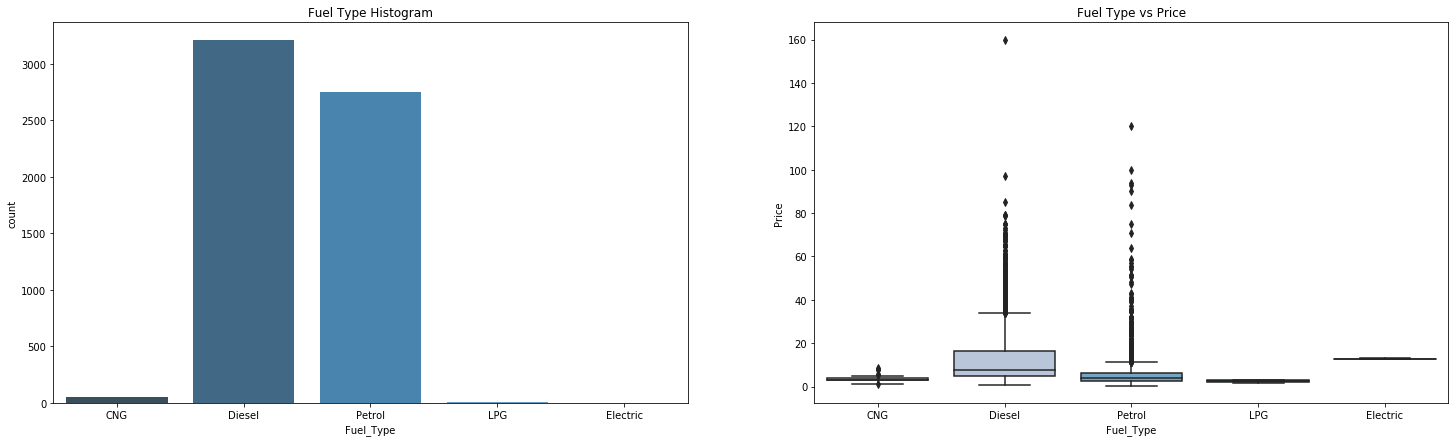

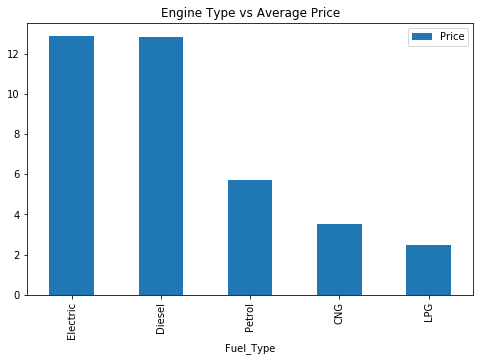

In [356]:
plt.figure(figsize=(25,7))

plt.subplot(1,2,1)
plt.title('Fuel Type Histogram')
sns.countplot(final_df.Fuel_Type, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Fuel Type vs Price')
sns.boxplot(x=final_df.Fuel_Type, y=final_df.Price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(final_df.groupby(['Fuel_Type'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,5))
plt.title('Engine Type vs Average Price')
plt.show()

Diesel Fuel type seems to be most favored type.
Diesel has the highest price range (While electric has only one row), petrol and cng have the low price range.

Now let us see what are the highly correlated features, which are the important features for our analysis.
The function corr() by default uses pearson correlation

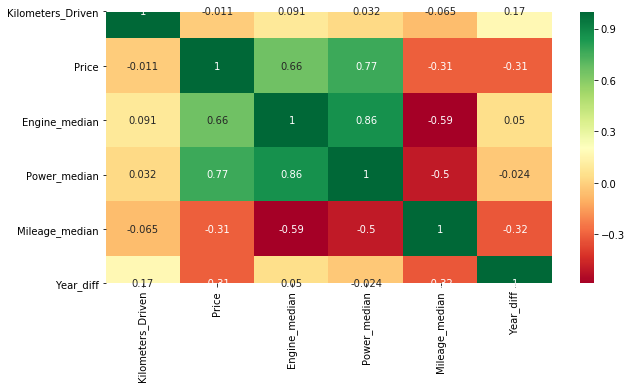

In [357]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = final_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,5))
#plot heat map
g=sns.heatmap(final_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Highly correlated variables to price are engine and power 

Green colour basically tell us the highly positive correlated features while the red tells us the highly negative correlated features. 

Before we start building a model, we will convert the categorical variables into numeric.
For this we use Dummy variable trap
The Dummy Variable trap is a scenario in which the independent variables are multicollinear - a scenario in which two or more variables are highly correlated; in simple terms one variable can be predicted from the others.

In [358]:
final_df=pd.get_dummies(final_df,drop_first=True)
final_df.head()

,Kilometers_Driven,Price,Engine_median,Power_median,Mileage_median,Year_diff,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,72000,1.75,998.0,58.16,26.60,10,0,0,0,0,1,0,0,0
1,41000,12.50,1582.0,126.20,19.67,5,1,0,0,0,1,0,0,0
2,46000,4.50,1199.0,88.70,18.20,9,0,0,0,1,1,0,0,0
3,87000,6.00,1248.0,88.76,20.77,8,1,0,0,0,1,0,0,0
4,40670,17.74,1968.0,140.80,15.20,7,1,0,0,0,0,0,1,0


Here we have our dependent variable as Price and all other as independent
IV - independent variables
DV - dependent variables 

In [359]:
#fetching the independent and dependent features
IV=final_df.iloc[:,0:]
DV=final_df.iloc[:,2]

In [360]:
#to check my price column (dependent variable)
DV.head()

0     998.0
1    1582.0
2    1199.0
3    1248.0
4    1968.0
Name: Engine_median, dtype: float64

Let us check which are the important features 

D:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[1.18028242e-04 7.85691353e-04 6.80927839e-01 1.15351195e-01
 6.04982489e-02 2.70288664e-04 3.23123860e-02 6.09880297e-05
 1.74589136e-07 8.30758329e-04 1.08800869e-01 0.00000000e+00
 3.61456997e-05 7.38746362e-06]


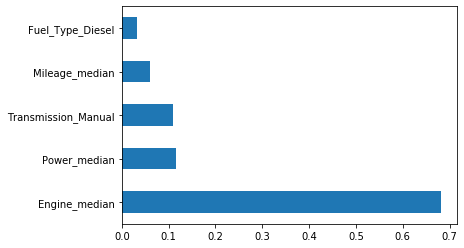

In [372]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(IV,DV)

ExtraTreesRegressor()

print(model.feature_importances_)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=IV.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

# Step 3 Model building 
We will now divide our dataset into train and test split and carry out the further analysis

In [374]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(IV, DV, test_size=0.2, random_state=0)

In [375]:
X_train.shape

(4815, 14)

In [362]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor()

Check all the parameters using shift+tab
We have n_estimators parameter which is basically called as Decision Trees. It can be assigned diff values, by default is 100

Let us use these hyper parameters like n_estimators, max_features, max_depth etc

Firstly lets assign values to the decision trees i.e. n_estimators between 100 to 1200

In [364]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


RandomizedSearchCV is faster compared to GridSearchCV.

Randomized Search CV - use this to perform Hyperparameter tuning.
Helps us to find the best parameters.

Default criterion used for regression is Mean Squared Error

In [381]:
from sklearn.model_selection import RandomizedSearchCV

In [382]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid in the form of key value pairs 
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [383]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

Here we have used the cross validation as well.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

In [384]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
#verbose is used only to display those values and iterations. 
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, scoring='neg_mean_squared_error', 
                               n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [385]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.1s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   4.0s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   5.8s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.9min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators='warn',
                                                   n_jobs=None, oob_score=False,
                                                   random_sta...


In [386]:
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 15}

In [397]:
rf_random.best_score_

-250.7832452530993

In [388]:
predictions=rf_random.predict(X_test)

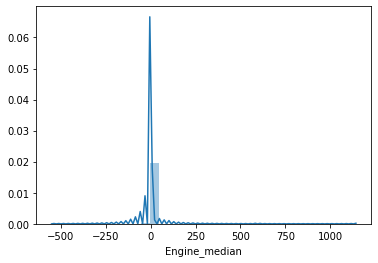

In [389]:
sns.distplot(y_test-predictions)

Text(0.5, 0.98, 'y_test vs predictions')

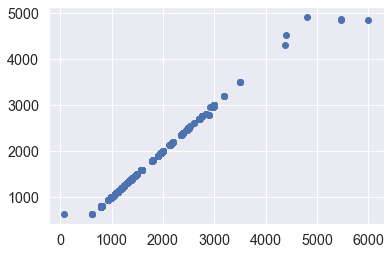

In [410]:
plt.scatter(y_test,predictions)
fig.suptitle('y_test vs predictions')

By looking at the plot, we can see that the predictions are pretty good. The plot is linear, the values of predictions and ytest are almost in line 

In [404]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))


MAE: 3.2961105216737208
MSE: 1978.9739299318308
RMSE: 44.48565982349628


In [ ]:
from pycaret.regression import *

In [ ]:
!pip install pycaret==2.0